In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

ls

cd '/content/drive/MyDrive/2021-2C/ORGANIZACION DE DATOS (7506)/TPs/TP3/Parte II - Machine Learning Baseline'

In [2]:
df_train = pd.read_csv('../ieee-fraud-detection/train_merged.csv')

In [3]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


Voy a rellenar los nans numéricos con el mean() y los categoricos con 'desconocido'

In [4]:
cat_columns_train=df_train.select_dtypes(include=object).columns
num_columns_train=df_train.select_dtypes(exclude=object).columns

In [5]:
df_train[cat_columns_train]=df_train[cat_columns_train].fillna('desconocido')

In [6]:
for col in num_columns_train:
    df_train[col] = df_train[col].fillna(df_train[col].mode())

In [7]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,321.0,150.0,discover,142.0,...,desconocido,24.0,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


#### Exploracion de columnas

##### M1-M9

In [8]:
df_train.filter(like='M',axis=1)

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,desconocido,desconocido,desconocido
1,desconocido,desconocido,desconocido,M0,T,T,desconocido,desconocido,desconocido
2,T,T,T,M0,F,F,F,F,F
3,desconocido,desconocido,desconocido,M0,T,F,desconocido,desconocido,desconocido
4,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
...,...,...,...,...,...,...,...,...,...
590535,T,T,T,M0,T,F,F,F,T
590536,T,F,F,M0,F,T,F,F,F
590537,T,F,F,desconocido,desconocido,T,desconocido,desconocido,desconocido
590538,T,T,T,M0,F,T,desconocido,desconocido,desconocido


##### C1-C14

In [9]:
df_train.filter(like='C',axis=1).drop('ProductCD',axis=1)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


##### ids

In [10]:
df_train.filter(like='id',axis=1)

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,...,desconocido,desconocido,desconocido,24.0,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,desconocido,desconocido,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,desconocido,desconocido,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,desconocido,desconocido,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
4,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,desconocido,desconocido,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
590536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,desconocido,desconocido,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
590537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,desconocido,desconocido,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido
590538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,desconocido,desconocido,desconocido,NaN,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido


##### emaildomain

In [11]:
df_train.R_emaildomain.value_counts()

desconocido        453249
gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
                    ...  
netzero.com            14
frontiernet.net        14
centurylink.net        12
netzero.net             9
sc.rr.com               8
Name: R_emaildomain, Length: 61, dtype: int64

In [12]:
df_train.P_emaildomain.value_counts()

gmail.com           228355
yahoo.com           100934
desconocido          94456
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
n

##### cardX

In [13]:
df_train.filter(like='card',axis=1)

,card1,card2,card3,card4,card5,card6
0,13926,321.0,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...
590535,6550,NaN,150.0,visa,226.0,debit
590536,10444,225.0,150.0,mastercard,224.0,debit
590537,12037,595.0,150.0,mastercard,224.0,debit
590538,7826,481.0,150.0,mastercard,224.0,debit


Veamos que valores tiene las categoricas

In [14]:
df_train.card6.value_counts()

debit              439938
credit             148986
desconocido          1571
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [15]:
df_train.card4.value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
desconocido           1577
Name: card4, dtype: int64

In [16]:
df_train.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

#### Matriz de correlacion

Ahora que se que datos tienen las columnas, voy a hacer una matriz de correlacion para analizar las columnas numericas.

In [17]:
matrix_corr = df_train.corr()
matrix_corr.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019899,-0.010091,-0.023900,-0.000370,0.057213,...,0.222835,0.111957,-0.015024,0.084097,-0.028843,0.052688,-0.038113,0.020692,0.013569,-0.066426
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,...,0.150102,0.050000,-0.041720,0.061595,0.063575,0.118423,-0.001856,0.034049,0.099563,0.069703
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019201,-0.011222,-0.024132,-0.000051,0.051972,...,0.214807,0.110218,-0.011809,0.082002,-0.024105,0.051498,-0.031109,0.020390,0.017698,-0.071382
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,...,-0.334969,-0.096853,0.076174,-0.105867,-0.031806,-0.104601,0.080153,0.016150,0.023077,-0.041848
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,...,0.018887,0.008878,0.022613,0.015921,0.043966,0.016801,0.057397,-0.010207,0.078544,-0.009531


Tomo el módulo para ver qué datos son importantes para predecir tanto el fraude como el no fraude

In [18]:
# vemos las mejor correlacion tiene 
isFraud_corr = abs(matrix_corr.isFraud.sort_values(ascending=False).drop('isFraud'))
isFraud_corr

V257     0.383060
V246     0.366878
V244     0.364129
V242     0.360591
V201     0.328005
           ...   
V49      0.110920
V48      0.115785
id_01    0.120100
D7       0.127193
D8       0.142633
Name: isFraud, Length: 402, dtype: float64

Los primeros valores son casi todos los de VXXX, voy a plotear el más alto para ver su comportamiento con respecto algunas variables categóricascat_columns_train

In [19]:
cat_columns_train

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

<AxesSubplot:xlabel='V257', ylabel='ProductCD'>

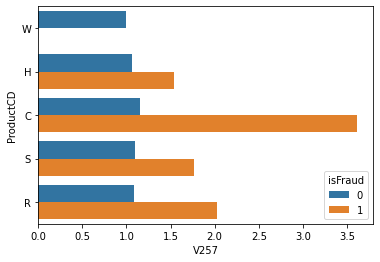

In [84]:
sns.barplot(x=df_train.V257,y=df_train.ProductCD,hue=df_train.isFraud,estimator=np.mean,ci=None)

In [60]:
productCD_fraud_count=df_train.groupby('ProductCD').agg({'isFraud':'count'}).reset_index()

In [61]:
productCD_fraud_count

,ProductCD,isFraud
0,C,68519
1,H,33024
2,R,37699
3,S,11628
4,W,439670


<AxesSubplot:xlabel='ProductCD', ylabel='isFraud'>

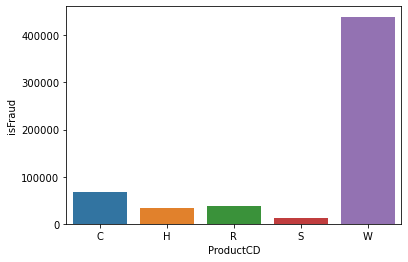

In [63]:
sns.barplot(x=productCD_fraud_count.ProductCD,y=productCD_fraud_count.isFraud)

Que raro que aunque el la mayor la cantidad de fraudes se encuentre en el producto W, no haya datos de ese producto en V257

<AxesSubplot:xlabel='V257', ylabel='card4'>

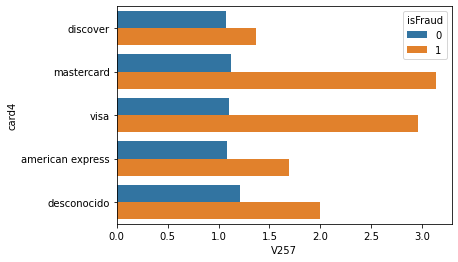

In [78]:
sns.barplot(x=df_train.V257,y=df_train.card4,hue=df_train.isFraud,estimator=np.mean,ci=None)

<AxesSubplot:xlabel='V257', ylabel='card6'>

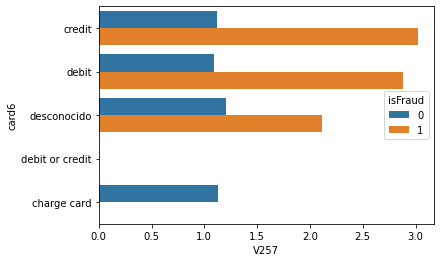

In [79]:
sns.barplot(x=df_train.V257,y=df_train.card6,hue=df_train.isFraud,estimator=np.mean,ci=None)

Parece que para valores altos de V257 indica que hay fraude

In [23]:
df_train.V257.describe()

count    130431.000000
mean          1.250991
std           1.299952
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          48.000000
Name: V257, dtype: float64

In [82]:
df_train.groupby('V257').agg({'isFraud':'count'}).reset_index().sort_values('isFraud',ascending=False).head()

,V257,isFraud
1,1.0,115836
2,2.0,9578
3,3.0,2196
4,4.0,843
5,5.0,489


In [74]:
isFraud_corr = isFraud_corr.drop(isFraud_corr.filter(like='V').index)

In [75]:
isFraud_corr

card3    0.154151
id_17    0.150102
id_22    0.118423
id_26    0.099563
id_32    0.069703
           ...   
D2       0.083583
id_07    0.084688
id_01    0.120100
D7       0.127193
D8       0.142633
Name: isFraud, Length: 63, dtype: float64

#### Comportamiento ProductCD y card4

In [149]:
heatmap_df = df_train.groupby(['card4','ProductCD'])['isFraud'].mean().unstack().fillna(0)
heatmap_df

ProductCD,C,H,R,S,W
card4,,,,,
american express,1.000000,0.058110,0.018084,0.056270,0.000000
desconocido,0.092308,0.100000,1.000000,0.000000,0.015317
discover,0.000000,0.074627,0.051423,0.132759,0.076730
mastercard,0.112043,0.052028,0.050188,0.049480,0.017122
visa,0.120184,0.044702,0.038413,0.058584,0.021178


<AxesSubplot:xlabel='ProductCD', ylabel='card4'>

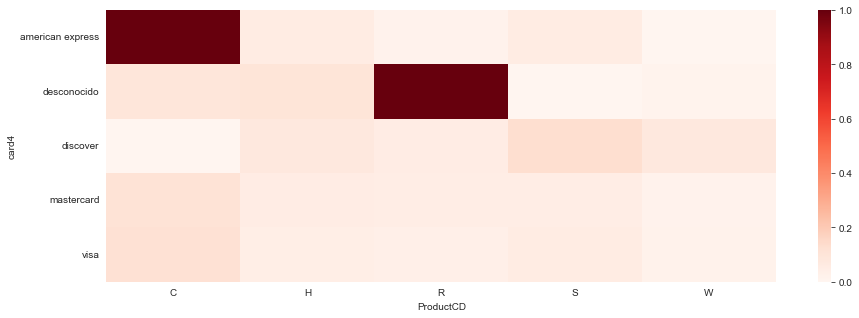

In [150]:
sns.heatmap(heatmap_df,cmap='Reds')

#### Comportamiento TransactionAmt

In [107]:
violinplot_df = df_train[['TransactionAmt','card4','isFraud']]
violinplot_df = violinplot_df[violinplot_df.TransactionAmt < 700]

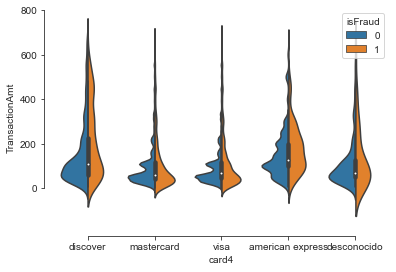

In [109]:
sns.set_style("ticks")
f, ax = plt.subplots()
sns.violinplot(y=violinplot_df.TransactionAmt, x=violinplot_df.card4, hue = violinplot_df.isFraud,split=True)
sns.despine(offset=10, trim=True);

#### Comportamiento id_26

In [113]:
df_train.id_26.value_counts()

161.0    825
184.0    582
142.0    528
102.0    451
100.0    433
        ... 
214.0      1
127.0      1
101.0      1
200.0      1
198.0      1
Name: id_26, Length: 95, dtype: int64

In [114]:
boxplot_df = df_train[['card4','id_26','isFraud']].dropna()

In [115]:
boxplot_df

,card4,id_26,isFraud
0,discover,161.0,0
99,visa,184.0,0
188,visa,102.0,0
1062,visa,159.0,1
1064,visa,159.0,1
...,...,...,...
589701,mastercard,142.0,0
589874,visa,169.0,0
590384,visa,161.0,0
590442,american express,142.0,0


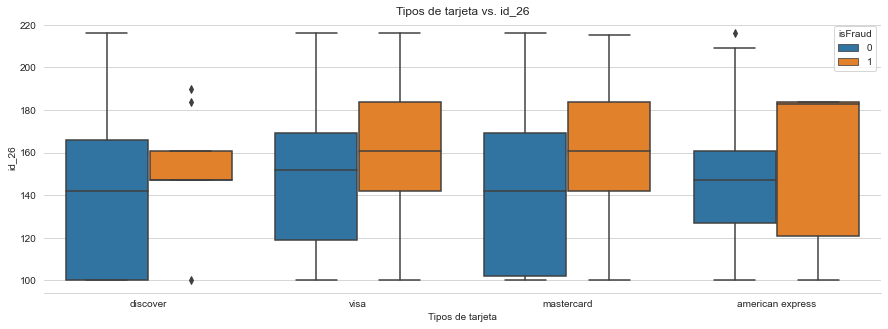

In [123]:
sns.set_style("whitegrid")
ax = sns.boxplot(y=boxplot_df.id_26, x=boxplot_df.card4, hue=boxplot_df.isFraud)
sns.despine(left=True)
ax.set_title('Tipos de tarjeta vs. id_26')
ax.set(xlabel='Tipos de tarjeta', ylabel='id_26')
plt.show()

#### Comportamiento X_emaildomain

In [118]:
email_df = df_train[['P_emaildomain','R_emaildomain','isFraud']].dropna()
email_df

,P_emaildomain,R_emaildomain,isFraud
0,desconocido,desconocido,0
1,gmail.com,desconocido,0
2,outlook.com,desconocido,0
3,yahoo.com,desconocido,0
4,gmail.com,desconocido,0
...,...,...,...
590535,desconocido,desconocido,0
590536,gmail.com,desconocido,0
590537,gmail.com,desconocido,0
590538,aol.com,desconocido,0


In [119]:
P_emaildomain_fraud_df = email_df.groupby('P_emaildomain').agg({'isFraud':'mean'}).sort_values(by='isFraud',ascending=False).head().reset_index()
P_emaildomain_fraud_df

,P_emaildomain,isFraud
0,protonmail.com,0.407895
1,mail.com,0.189624
2,outlook.es,0.130137
3,aim.com,0.126984
4,outlook.com,0.094584


In [120]:
R_emaildomain_fraud_df = email_df.groupby('R_emaildomain').agg({'isFraud':'mean'}).sort_values(by='isFraud',ascending=False).head().reset_index()
R_emaildomain_fraud_df

,R_emaildomain,isFraud
0,protonmail.com,0.951220
1,mail.com,0.377049
2,netzero.net,0.222222
3,outlook.com,0.165138
4,outlook.es,0.131640


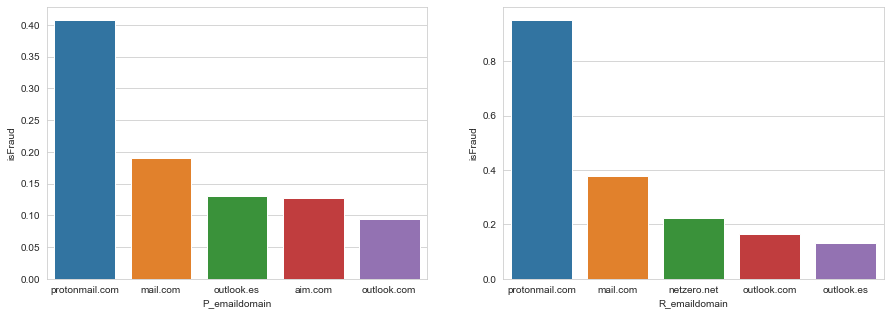

In [122]:
fig, axs = plt.subplots(ncols=2)
plt.rcParams["figure.figsize"] = (15,5)
fig1 = sns.barplot(y=P_emaildomain_fraud_df.isFraud, x=P_emaildomain_fraud_df.P_emaildomain,ax=axs[0])
fig2 = sns.barplot(y=R_emaildomain_fraud_df.isFraud, x=R_emaildomain_fraud_df.R_emaildomain,ax=axs[1])